<a href="https://colab.research.google.com/github/joaovictordds/Data-Analysis/blob/main/Delivery_Center_Food_%26_Goods_orders_in_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **OBJETIVO:** Análise de dados de uma plataforma de marketplace brasileira.

---

**O que é o Delivery Center?**

Com seus diversos hubs operacionais espalhados pelo Brasil, o Delivery Center é uma plataforma integra lojistas e marketplaces, criando um ecossistema saudável para vendas de good (produtos) e food (comidas) no varejo brasileiro.

Atualmente temos um cadastro (catálogo + cardápio) com mais de 900 mil itens, milhares de pedidos e entregas são operacionalizados diariamente com uma rede de milhares lojistas e entregadores parceiros espalhados por todas as regiões do país.

Tudo isso gera dados e mais dados a todo momento!

Diante disso, nosso negócio está cada vez data driven, ou seja, utilizando dados para tomar decisões e numa visão de futuro sabemos que utilizar os dados de forma inteligente pode ser o nosso grande diferencial no mercado.

**Este é o nosso contexto e com ele lhe propomos um desafio em que você possa aplicar seus conhecimentos técnicos objetivando resolver problemas cotidianos de uma equipe de dados.**

* Gere insigths sobre as informações coletadas

---


Sobre os dados:

* Este modelo representa, de forma fictícia, dados de pedidos e entregas que foram processados pelo Delivery Center entre os meses de **janeiro a abril** de 2021.

* Eeste é um modelo lógico e está fisicamente disponível em datasets no formato csv, ou seja, cada dataset fisicamente disponível representa uma tabela neste esquema abaixo. Aqui estão os datasets.
---

*Os dados não possuem a completude de toda operação do Delivery Center e algumas informações foram anonimizadas devido ao nosso tratamento com a Lei Geral de Proteção de Dados (LGPD).*

- channels: Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.
- deliveries: Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.
- drivers: Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.
- hubs: Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.
- orders: Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.
- payments: Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.
- stores: Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

*link dos dados: https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?rvi=1*

#### Carregamento e preparação dos dados

In [1]:
#Importação das bibliotecas
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
# Carregando arquivos CSV em dataframes
channels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/channels.csv')
deliveries = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/deliveries.csv')
drivers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/drivers.csv')
hubs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/hubs.csv', encoding='latin1')
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/orders.csv')
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/payments.csv', encoding='latin1')
stores= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/stores.csv', encoding='latin1')

#### Localização

In [ ]:
stores = stores.drop(columns=['store_plan_price']) # deletarei colunas desnecessarias para realizar análise visto que há muitos dados
stores = stores.dropna() # Drops all rows that contain null values

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 1 to 950
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         935 non-null    int64  
 1   hub_id           935 non-null    int64  
 2   store_name       935 non-null    object 
 3   store_segment    935 non-null    object 
 4   store_latitude   935 non-null    float64
 5   store_longitude  935 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 51.1+ KB


In [ ]:
stores.nunique()

store_id           935
hub_id              29
store_name         467
store_segment        2
store_latitude      92
store_longitude     87
dtype: int64

In [ ]:
stores.value_counts('store_segment')#.plot(kind='pie');

store_segment
GOOD    567
FOOD    384
dtype: int64

In [ ]:
goods = stores[stores['store_segment']== 'GOOD']
foods = stores[stores['store_segment']== 'FOOD']

In [ ]:
import folium
from IPython.display import display

# Criando um mapa Folium
mymap = folium.Map(location=[-15.7801, -47.9292], zoom_start=5)  # coordenadas do Brasil

# Adicionando marcadores para cada ponto no DataFrame
for index, row in stores.iterrows():
    folium.Marker([row['store_latitude'], row['store_longitude']]).add_to(mymap)

# Exibir o mapa no notebook
display(mymap)
# Salvar o mapa como um arquivo HTML
#mymap.save("mapa.html")

In [ ]:
# Salvando base tratada
stores.to_csv('stores.csv')

#### Payments (pagamentos)

In [ ]:
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/payments.csv', encoding='latin1')

In [ ]:
payments.sample(3)

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
384279,5427428,92669433,162.3,4.38,ONLINE,PAID
1590,4432441,68628282,42.9,0.64,ONLINE,PAID
109525,4715847,77234548,73.8,1.99,ONLINE,PAID


In [ ]:
payments = payments.drop(columns=['payment_status'])
payments = payments.dropna() # Drops all rows that contain null values (-+200 lines)

In [ ]:
# Agrupando linhas com poucos dados
payments['payment_method'] = payments['payment_method'].replace('DEBIT_STORE', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('VOUCHER_STORE', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('PAYMENT_LINK', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('CREDIT_STORE', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('MONEY', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('VOUCHER_DC', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('INSTALLMENT_CREDIT_STORE', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('VOUCHER_OL', 'OTHER')
payments['payment_method'] = payments['payment_method'].replace('BANK_TRANSFER_DC', 'OTHER')

In [ ]:
payments['payment_method'].value_counts()

ONLINE                  312250
VOUCHER                  48570
DEBIT                    12327
OTHER                     9310
MEAL_BENEFIT              6687
STORE_DIRECT_PAYMENT      6572
CREDIT                    4943
Name: payment_method, dtype: int64

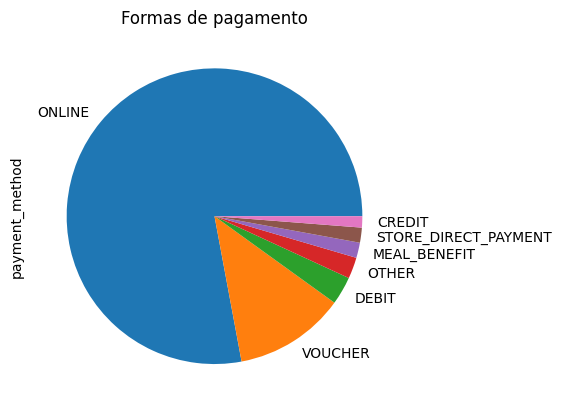

In [ ]:
payments['payment_method'].value_counts().plot(kind='pie', title='Formas de pagamento');

Vamos analisar a variavel taxa de pgmto

In [ ]:
payments['payment_fee'].describe()

count    400659.000000
mean          1.880510
std           4.540013
min           0.000000
25%           0.440000
50%           1.040000
75%           2.710000
max        2000.000000
Name: payment_fee, dtype: float64

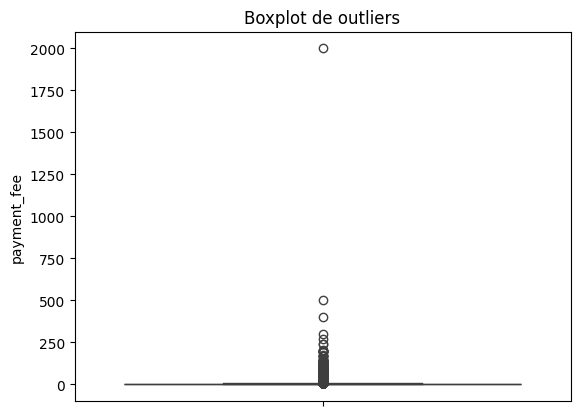

In [ ]:
# Supondo que 'data' seja o DataFrame contendo sua variável
sns.boxplot(payments['payment_fee'])
plt.title('Boxplot de outliers')
plt.show()

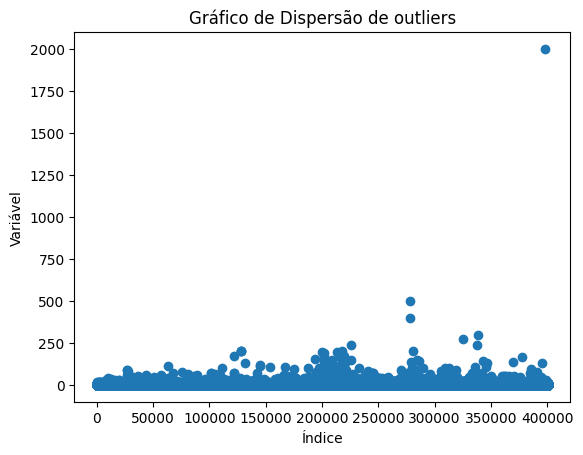

In [ ]:
plt.scatter(range(len(payments['payment_fee'])), payments['payment_fee'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

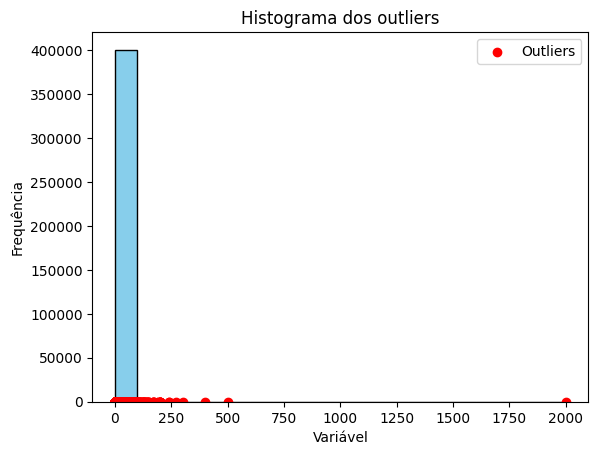

In [ ]:
plt.hist(payments['payment_fee'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma dos outliers')
plt.xlabel('Variável')
plt.ylabel('Frequência')

# Identificar outliers
outliers = payments['payment_fee']
plt.scatter(outliers, [0]*len(outliers), color='red', label='Outliers')
plt.legend()
plt.show()

In [ ]:
#payments.loc[payments['payment_fee'] >= 15].describe().round(2)
#Há poucas linhas com taxa acima de R$15 (equivalente a menos de 1%), que estao distorcendo a analise
payments = payments.drop(payments[(payments['payment_fee'] >=15)].index)

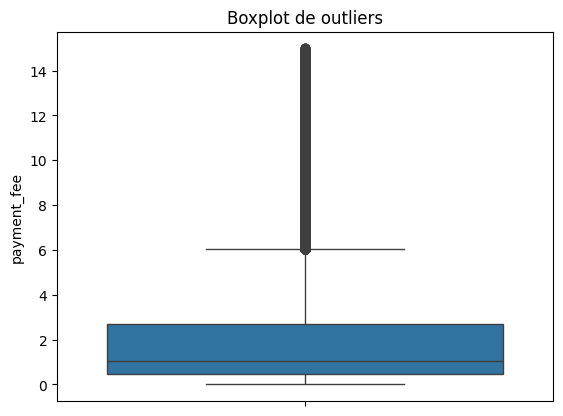

In [ ]:
# Supondo que 'data' seja o DataFrame contendo sua variável
sns.boxplot(payments['payment_fee'])
plt.title('Boxplot de outliers')
plt.show()

In [ ]:
payments.loc[payments['payment_fee'] >= 5].describe().round(2)
# ainda há poucos outliers, representando ~5% da base
payments = payments.drop(payments[(payments['payment_fee'] >=5)].index)

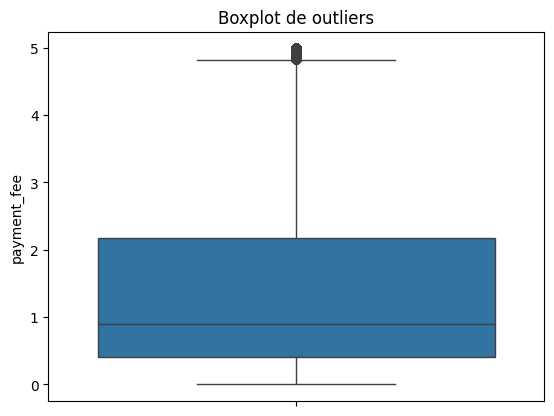

In [ ]:
# Supondo que 'data' seja o DataFrame contendo sua variável
sns.boxplot(payments['payment_fee'])
plt.title('Boxplot de outliers')
plt.show()

Agora, a variavel 'quantia'

In [ ]:
payments['payment_amount'].describe()

count    370096.000000
mean         72.328958
std          56.262912
min           0.000000
25%          30.200000
50%          59.800000
75%         105.300000
max        6399.000000
Name: payment_amount, dtype: float64

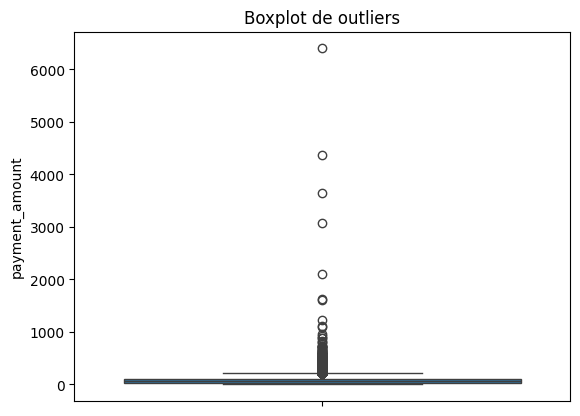

In [ ]:
# Supondo que 'data' seja o DataFrame contendo sua variável
sns.boxplot(payments['payment_amount'])
plt.title('Boxplot de outliers')
plt.show()

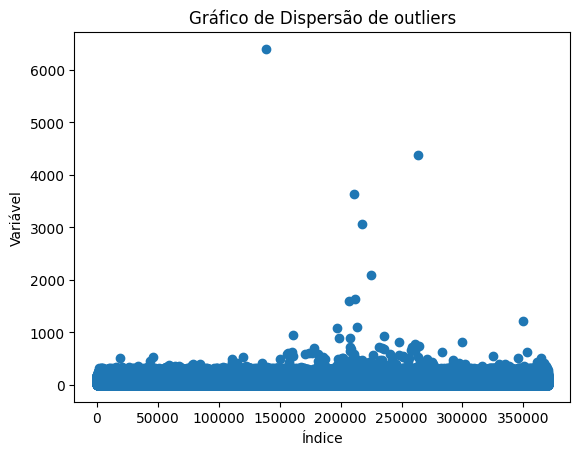

In [ ]:
plt.scatter(range(len(payments['payment_amount'])), payments['payment_amount'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

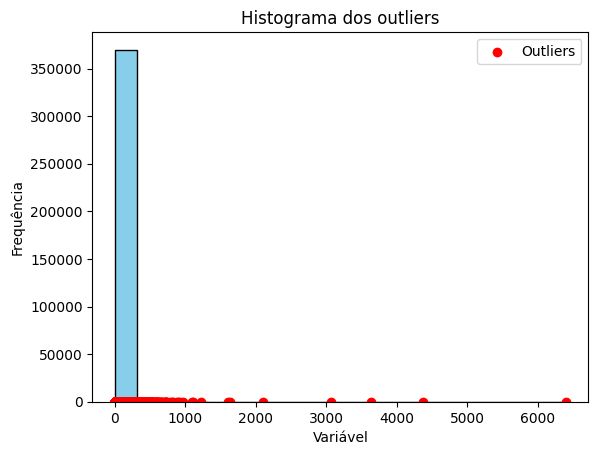

In [ ]:
plt.hist(payments['payment_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma dos outliers')
plt.xlabel('Variável')
plt.ylabel('Frequência')

# Identificar outliers
outliers = payments['payment_amount']
plt.scatter(outliers, [0]*len(outliers), color='red', label='Outliers')
plt.legend()
plt.show()

In [ ]:
payments.loc[payments['payment_amount'] >= 200].describe().round(2)
# ainda há poucos outliers, representando ~5% da base
payments = payments.drop(payments[(payments['payment_amount'] >=200)].index)

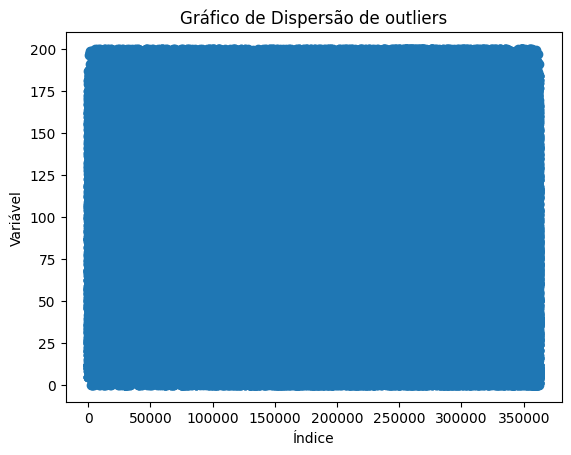

In [ ]:
plt.scatter(range(len(payments['payment_amount'])), payments['payment_amount'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

In [ ]:
#payments.describe().round(2)
payments.sample(5)

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method
247652,5076961,85772107,111.8,3.02,ONLINE
214063,4992385,84080639,78.7,2.12,ONLINE
225195,5020796,84746692,9.9,0.15,ONLINE
377173,5409307,92294688,174.7,2.62,ONLINE
293463,5193569,87726601,73.9,1.11,ONLINE


In [ ]:
#Ticket médio
payments['payment_amount'].describe().round(2)

count    362370.00
mean         68.65
std          47.97
min           0.00
25%          29.90
50%          58.70
75%         101.60
max         199.99
Name: payment_amount, dtype: float64

In [ ]:
payments.loc[payments['payment_amount'] >= 50].describe().round(2)

,payment_id,payment_order_id,payment_amount,payment_fee
count,202883.00,202883.00,202883.00,202883.00
mean,4943577.80,82140212.67,102.17,2.11
std,304836.19,7100495.14,37.60,1.19
min,4427917.00,68410055.00,50.00,0.00
25%,4673435.50,76039782.00,69.90,1.12
50%,4948098.00,83120153.00,94.70,1.86
75%,5208777.00,87939309.50,129.70,3.01
max,5540806.00,93139817.00,199.99,4.99


In [ ]:
#Gratificações?
payments.loc[payments['payment_amount'] == 0].describe().round(2)

,payment_id,payment_order_id,payment_amount,payment_fee
count,125.00,125.00,125.0,125.0
mean,5136383.86,86666305.04,0.0,0.0
std,259467.80,5422188.78,0.0,0.0
min,4461324.00,69660936.00,0.0,0.0
25%,4938899.00,82916998.00,0.0,0.0
50%,5104208.00,86278843.00,0.0,0.0
75%,5406214.00,92190806.00,0.0,0.0
max,5467823.00,93136738.00,0.0,0.0


In [ ]:
# Pedidos voucher sem custo de tarifas
payments.loc[payments['payment_fee'] == 0].describe().round(2)

,payment_id,payment_order_id,payment_amount,payment_fee
count,59550.00,59550.00,59550.00,59550.0
mean,4955577.73,82483900.13,22.19,0.0
std,296394.38,6854176.41,27.85,0.0
min,4427917.00,68410055.00,0.00,0.0
25%,4712357.00,77104264.25,10.00,0.0
50%,4948591.00,83129516.50,10.39,0.0
75%,5208903.75,87939789.00,20.00,0.0
max,5471356.00,93139805.00,199.90,0.0


In [ ]:
payments.to_csv('payments.csv')

#### Orders

In [69]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/orders.csv')

In [70]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

In [71]:
orders.sample(3)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
297049,89192858,149,5,89192858,89192858,FINISHED,46.9,11.9,5.00,23,41,9,4,2021,4/9/2021 11:41:04 PM,4/9/2021 11:41:14 PM,4/9/2021 11:53:30 PM,4/9/2021 11:55:37 PM,4/9/2021 11:58:44 PM,4/10/2021 12:04:20 AM,NaN,4/10/2021 12:19:15 AM,2.12,5.60,12.43,5.23,10.83,14.92,38.18
40470,72169642,955,5,72169642,72169642,FINISHED,35.9,0.0,8.01,14,37,18,1,2021,1/18/2021 2:37:00 PM,1/18/2021 2:37:40 PM,1/18/2021 2:45:42 PM,1/18/2021 2:46:28 PM,1/18/2021 2:47:52 PM,1/18/2021 2:48:55 PM,NaN,1/18/2021 3:03:45 PM,0.77,1.05,8.70,2.15,3.20,14.83,26.75
150188,80919670,274,5,80919670,80919670,FINISHED,213.7,11.9,8.52,23,5,1,3,2021,3/1/2021 11:05:22 PM,3/1/2021 11:05:46 PM,3/1/2021 11:19:08 PM,3/1/2021 11:22:22 PM,3/1/2021 11:24:28 PM,3/1/2021 11:36:14 PM,NaN,3/2/2021 12:07:42 AM,3.23,11.77,13.77,5.33,17.12,31.45,62.33


In [72]:
orders.drop(['order_moment_accepted',	'order_moment_ready',	'order_moment_collected',	'order_moment_in_expedition','order_moment_delivering',	'order_metric_collected_time',
             'order_metric_paused_time'	,'order_metric_production_time'	,'order_metric_walking_time','order_metric_expediton_speed_time' ,
             'order_moment_delivered','order_metric_transit_time',	'order_metric_cycle_time'], axis=1, inplace= True) # deleta a coluna selecionada

In [73]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               368999 non-null  int64  
 1   store_id               368999 non-null  int64  
 2   channel_id             368999 non-null  int64  
 3   payment_order_id       368999 non-null  int64  
 4   delivery_order_id      368999 non-null  int64  
 5   order_status           368999 non-null  object 
 6   order_amount           368999 non-null  float64
 7   order_delivery_fee     368999 non-null  float64
 8   order_delivery_cost    361794 non-null  float64
 9   order_created_hour     368999 non-null  int64  
 10  order_created_minute   368999 non-null  int64  
 11  order_created_day      368999 non-null  int64  
 12  order_created_month    368999 non-null  int64  
 13  order_created_year     368999 non-null  int64  
 14  order_moment_created   368999 non-nu

Outliers

In [74]:
# Calcular a média da coluna
mean_value = orders['order_delivery_cost'].mean()

# Substituir os valores em branco pela média
orders['order_delivery_cost'] = orders['order_delivery_cost'].fillna(mean_value)

In [75]:
#Deletando linhas com valores em branco - 15k aprox.
orders.dropna(inplace=True)

Tratamento de Datas

In [76]:
# Removendo as datas da varivel
orders['pedido_finaliz'] = orders['order_moment_finished'].str.split(' ').str[1].str[:-3]
orders['pedido_criado'] = orders['order_moment_created'].str.split(' ').str[1].str[:-3]
orders.sample(3)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_finished,pedido_finaliz,pedido_criado
133940,79774255,496,5,79774255,79774255,FINISHED,150.85,11.9,8.02,16,6,24,2,2021,2/24/2021 4:06:34 PM,2/24/2021 4:56:33 PM,4:56,4:06
29442,71151683,321,5,71151683,71151683,FINISHED,155.80,11.9,8.00,0,37,14,1,2021,1/14/2021 12:37:26 AM,1/14/2021 1:09:03 AM,1:09,12:37
110677,77891678,624,5,77891678,77891678,FINISHED,25.90,0.0,8.00,14,23,15,2,2021,2/15/2021 2:23:07 PM,2/15/2021 2:55:17 PM,2:55,2:23


In [77]:
orders['order_moment_created'] = orders['order_moment_created'].str.split(' ').str[0]
orders['order_moment_created'] = orders['order_moment_created'].str.replace(' AM', '').str.replace(' PM', '')
orders['data_pedido'] = orders['order_moment_created']
#Deletando variaveis antigas
orders.drop(['order_moment_created',	'order_moment_finished'], axis=1, inplace= True) # deleta a coluna selecionada
orders.sample(3)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,pedido_finaliz,pedido_criado,data_pedido
111170,77922352,1037,5,77922352,77922352,FINISHED,71.95,11.9,10.81,16,8,15,2,2021,4:42,4:08,2/15/2021
161791,81861905,2313,5,81861905,81861905,FINISHED,69.80,9.9,9.71,14,40,6,3,2021,3:19,2:40,3/6/2021
232073,86059373,978,21,86059373,86059373,FINISHED,80.92,0.0,9.27,2,19,26,3,2021,8:57,2:19,3/26/2021


In [78]:
orders['order_delivery_cost'].describe()

count    353400.000000
mean          7.582781
std           3.839097
min           0.000000
25%           5.610000
50%           7.310000
75%           8.770000
max         156.000000
Name: order_delivery_cost, dtype: float64

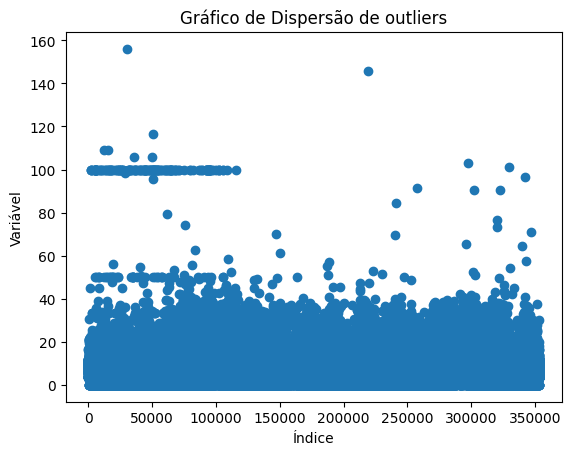

In [79]:
plt.scatter(range(len(orders['order_delivery_cost'])), orders['order_delivery_cost'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

In [80]:
# Verificando itens outliers
#orders.loc[orders['order_delivery_cost'] >100].describe().round(2) # 9 linhas
#orders.loc[orders['order_delivery_cost'] ==100].describe().round(2) #162 linhas
orders.loc[orders['order_delivery_cost'] >=20].describe().round(2) # 3321 linhas

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year
count,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.00,3330.0
mean,80845327.27,1221.07,16.17,80845327.27,80845327.27,160.57,5.45,31.01,14.80,29.94,15.17,2.48,2021.0
std,6600533.45,785.75,9.43,6600533.45,6600533.45,301.33,7.45,17.94,6.64,17.41,8.69,1.04,0.0
min,68451258.00,6.00,1.00,68451258.00,68451258.00,0.01,0.00,20.00,0.00,0.00,1.00,1.00,2021.0
25%,75588297.00,978.00,5.00,75588297.00,75588297.00,62.92,0.00,22.02,13.00,15.00,8.00,2.00,2021.0
50%,79926290.00,978.00,21.00,79926290.00,79926290.00,98.99,0.00,25.63,16.00,31.00,15.00,2.00,2021.0
75%,86762320.25,1093.00,21.00,86762320.25,86762320.25,187.89,11.12,31.45,20.00,45.00,22.00,3.00,2021.0
max,93139280.00,4650.00,48.00,93139280.00,93139280.00,13584.00,199.80,156.00,23.00,59.00,31.00,4.00,2021.0


In [81]:
# Deltando linhas
orders = orders.drop(orders[(orders['order_delivery_cost'] >100)].index)
orders = orders.drop(orders[(orders['order_delivery_cost'] == 100)].index)
orders = orders.drop(orders[(orders['order_delivery_cost'] >= 20)].index)

In [84]:
# Alterando dtype das variaveis necessarias
orders['pedido_criado'] = pd.to_datetime(orders['pedido_criado'], format='%H:%M').dt.time
orders['pedido_finaliz'] = pd.to_datetime(orders['pedido_finaliz'], format='%H:%M').dt.time
orders['data_pedido'] = pd.to_datetime(orders['data_pedido'], format='%m/%d/%Y')

In [85]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350070 entries, 8 to 368998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_id              350070 non-null  int64         
 1   store_id              350070 non-null  int64         
 2   channel_id            350070 non-null  int64         
 3   payment_order_id      350070 non-null  int64         
 4   delivery_order_id     350070 non-null  int64         
 5   order_status          350070 non-null  object        
 6   order_amount          350070 non-null  float64       
 7   order_delivery_fee    350070 non-null  float64       
 8   order_delivery_cost   350070 non-null  float64       
 9   order_created_hour    350070 non-null  int64         
 10  order_created_minute  350070 non-null  int64         
 11  order_created_day     350070 non-null  int64         
 12  order_created_month   350070 non-null  int64         
 13 

In [86]:
orders.sample(3)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,pedido_finaliz,pedido_criado,data_pedido
266072,87558303,1844,1,87558303,87558303,FINISHED,675.1,9.9,8.91,0,42,2,4,2021,02:52:00,12:42:00,2021-04-02
115179,78258496,864,15,78258496,78258496,FINISHED,49.8,5.9,8.12,23,41,16,2,2021,12:19:00,11:41:00,2021-02-16
167718,82216783,658,5,82216783,82216783,FINISHED,263.4,11.9,5.00,21,47,7,3,2021,10:25:00,09:47:00,2021-03-07


In [87]:
#Finalizando o tratamento da base
orders.to_csv('orders.csv')

Analise de Dados

In [88]:
#Taxa cancelamento
orders['order_status'].value_counts()

FINISHED    348753
CANCELED      1317
Name: order_status, dtype: int64

In [90]:
# Faturamento bruto
orders['order_amount'].sum().round(2)

36678863.83

In [91]:
# Custo total com tarifas
orders['order_delivery_fee'].sum()

2175862.4700000007

In [92]:
# Custo total com entregas
orders['order_delivery_cost'].sum()

2576502.1493308353

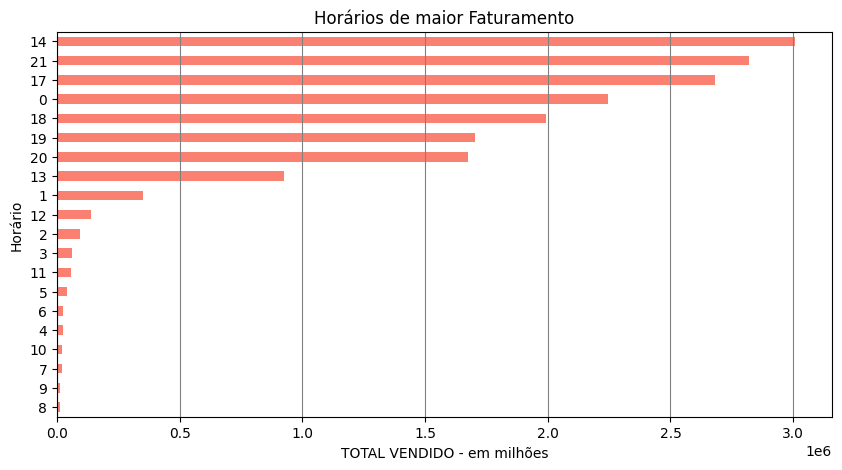

In [100]:
# Horario com mais demanda por pedidos
top_cl = orders.groupby('order_created_hour')['order_amount'].sum()
top_cl = top_cl.sort_values(ascending=True).head(20)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_cl.plot(kind='barh', color='salmon')
plt.title('Horários de maior Faturamento')
plt.xlabel('TOTAL VENDIDO - em milhões')
plt.ylabel('Horário')
plt.grid(axis='x', color='gray')
plt.show();

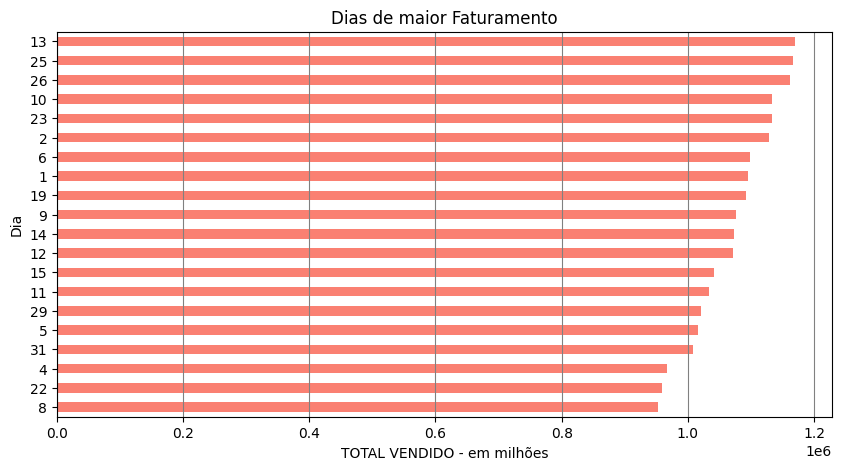

In [104]:
# Horario com mais demanda por pedidos
top_cl = orders.groupby('order_created_day')['order_amount'].sum()
top_cl = top_cl.sort_values(ascending=True).head(20)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_cl.plot(kind='barh', color='salmon')
plt.title('Dias de maior Faturamento')
plt.xlabel('TOTAL VENDIDO - em milhões')
plt.ylabel('Dia')
plt.grid(axis='x', color='gray')
plt.show();

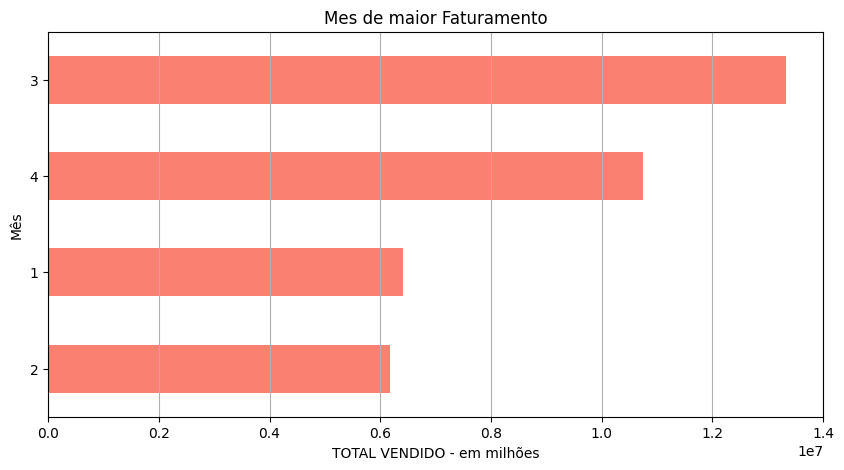

In [106]:
# Horario com mais demanda por pedidos
top_cl = orders.groupby('order_created_month')['order_amount'].sum()
top_cl = top_cl.sort_values(ascending=True).head(20)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_cl.plot(kind='barh', color='salmon')
plt.title('Mes de maior Faturamento')
plt.xlabel('TOTAL VENDIDO - em milhões')
plt.ylabel('Mês')
plt.grid(axis='x', color='gray')
plt.show();

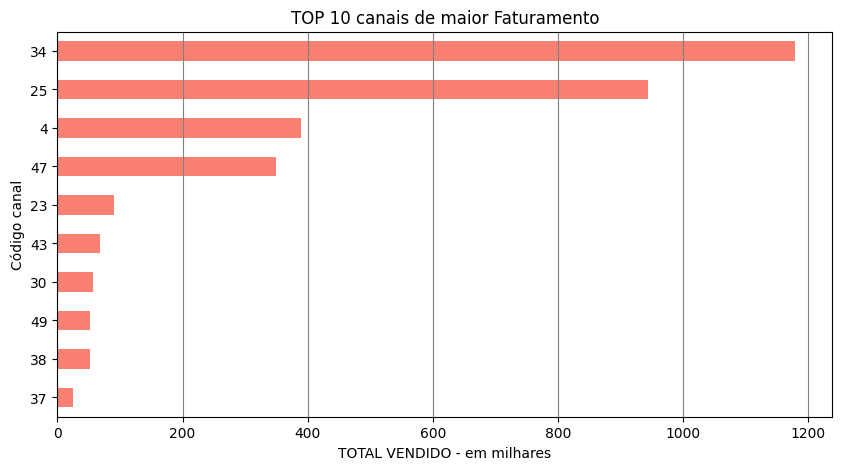

In [113]:
# Horario com mais demanda por pedidos
top_cl = orders.groupby('channel_id')['order_amount'].sum()
top_cl = top_cl.sort_values(ascending=True).head(10)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_cl.plot(kind='barh', color='salmon')
plt.title('TOP 10 canais de maior Faturamento')
plt.xlabel('TOTAL VENDIDO - em milhares')
plt.ylabel('Código canal')
plt.grid(axis='x', color='gray')
plt.show();

In [ ]:
orders.groupby('order_created_hour')['order_amount'].sum()

#### Hubs

In [116]:
hubs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/hubs.csv', encoding='latin1')

In [117]:
hubs.sample(3)

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
10,21,WOLF SHOPPING,SÃO PAULO,SP,-23.550407,-46.697316
26,55,ELIXIR SHOPPING,SÃO PAULO,SP,-23.521776,-46.624152
19,35,BEACH SHOPPING,RIO DE JANEIRO,RJ,-22.969880,-43.370811


In [119]:
hubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hub_id         32 non-null     int64  
 1   hub_name       32 non-null     object 
 2   hub_city       32 non-null     object 
 3   hub_state      32 non-null     object 
 4   hub_latitude   32 non-null     float64
 5   hub_longitude  32 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ KB


In [118]:
import folium
from IPython.display import display

# Criando um mapa Folium
mymap = folium.Map(location=[-15.7801, -47.9292], zoom_start=5)  # coordenadas do Brasil

# Adicionando marcadores para cada ponto no DataFrame
for index, row in hubs.iterrows():
    folium.Marker([row['hub_latitude'], row['hub_longitude']]).add_to(mymap)

# Exibir o mapa no notebook
display(mymap)
# Salvar o mapa como um arquivo HTML
#mymap.save("mapa.html")

#### Drivers

In [120]:
drivers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/drivers.csv')

In [121]:
drivers.sample(3)

,driver_id,driver_modal,driver_type
183,1184,BIKER,FREELANCE
3361,41633,BIKER,FREELANCE
2360,28668,MOTOBOY,FREELANCE


In [122]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB


In [123]:
#Motoristas cadastrados
drivers['driver_id'].nunique()

4824

In [134]:
drivers['driver_modal'].value_counts()

MOTOBOY    3222
BIKER      1602
Name: driver_modal, dtype: int64

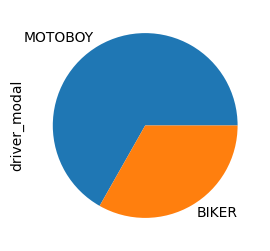

In [133]:
# Distribuição dos motoristas
drivers['driver_modal'].value_counts().plot(kind='pie',figsize=(3,3));

In [137]:
drivers['driver_type'].value_counts()

FREELANCE            3939
LOGISTIC OPERATOR     885
Name: driver_type, dtype: int64

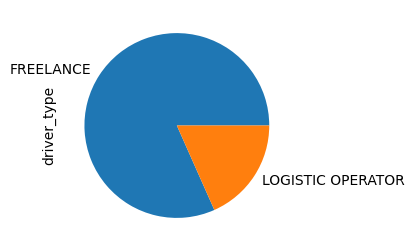

In [136]:
# Tipo de contrato
drivers['driver_type'].value_counts().plot(kind='pie',figsize=(3,3));

#### Deliveries

In [191]:
deliveries = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/deliveries.csv')

In [164]:
deliveries.sample(5)

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status,distancia_km
114091,2453207,77816655,8771.0,2067.0,DELIVERED,2.067
254294,2790768,86666968,35648.0,5339.0,DELIVERED,5.339
51318,2298353,73018572,11457.0,2316.0,DELIVERED,2.316
64768,2331278,74088342,1855.0,2746.0,DELIVERED,2.746
341804,3002526,91366067,56937.0,3047.0,DELIVERED,3.047


In [165]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362737 entries, 0 to 378842
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               362737 non-null  int64  
 1   delivery_order_id         362737 non-null  int64  
 2   driver_id                 362737 non-null  float64
 3   delivery_distance_meters  362737 non-null  float64
 4   delivery_status           362737 non-null  object 
 5   distancia_km              362737 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 19.4+ MB


In [141]:
deliveries.dropna(inplace=True)

In [143]:
deliveries.nunique()

delivery_id                 362928
delivery_order_id           344054
driver_id                     4583
delivery_distance_meters     14777
delivery_status                  2
dtype: int64

In [144]:
deliveries['delivery_status'].value_counts()

DELIVERED     362737
DELIVERING       191
Name: delivery_status, dtype: int64

In [192]:
deliveries = deliveries.drop(deliveries[(deliveries['delivery_status'] >= 'DELIVERING')].index)

In [193]:
deliveries['distancia_km'] = deliveries['delivery_distance_meters']/1000

In [ ]:
# Somar a distância percorrida por cada motorista
soma_distancia = deliveries.groupby('driver_id')['distancia_km'].sum().reset_index()
# Ordenar os resultados do que mais percorreu para o menos
soma_distancia = soma_distancia.sort_values(by='distancia_km', ascending=False)

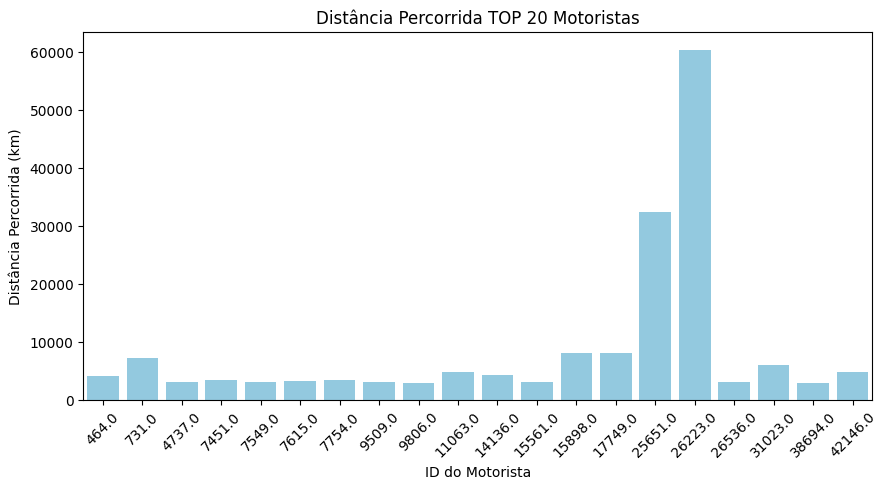

In [179]:
import seaborn as sns
# Plote do gráfico de barras
plt.figure(figsize=(9, 5))
sns.barplot(data=soma_distancia.head(20), x='driver_id', y='distancia_km', color='skyblue')
plt.xlabel('ID do Motorista')
plt.ylabel('Distância Percorrida (km)')
plt.title('Distância Percorrida TOP 20 Motoristas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [182]:
deliveries.loc[deliveries['driver_id'] ==17749]
#deliveries.loc[deliveries['driver_id'] ==25651]

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status,distancia_km
272,2175381,68447904,17749.0,3023.0,DELIVERED,3.023
417,2175737,68463388,17749.0,5337.0,DELIVERED,5.337
682,2176339,68495930,17749.0,3042.0,DELIVERED,3.042
1584,2178573,68620848,17749.0,5064.0,DELIVERED,5.064
1902,2179286,68645365,17749.0,1763.0,DELIVERED,1.763
...,...,...,...,...,...,...
377997,3090595,93136136,17749.0,6037.0,DELIVERED,6.037
378549,3091868,93138764,17749.0,3536.0,DELIVERED,3.536
378707,3092455,93139320,17749.0,2121.0,DELIVERED,2.121
378708,3092457,93139281,17749.0,1828.0,DELIVERED,1.828


In [183]:
deliveries = deliveries.drop(deliveries[(deliveries['driver_id'] == 17749)].index)
deliveries = deliveries.drop(deliveries[(deliveries['driver_id'] == 25651)].index)

In [185]:
deliveries.describe().round(2)

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,distancia_km
count,350942.00,350942.00,350942.00,350942.00,350942.00
mean,2637428.60,82283355.99,20863.52,2798.05,2.80
std,266513.11,7047288.80,15755.43,18599.91,18.60
min,2174658.00,68410055.00,133.00,0.00,0.00
25%,2404557.75,76292843.25,7456.00,1158.00,1.16
50%,2646455.50,83336125.50,17660.00,2020.00,2.02
75%,2866201.25,87959018.50,31639.00,3378.00,3.38
max,3144739.00,93139817.00,66459.00,7251291.00,7251.29


In [ ]:
deliveries.loc[deliveries['distancia_km'] ==0]

In [194]:
deliveries.to_csv('deliveries.csv')

#### Channels

In [195]:
channels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/6. Delivery Center: Food & Goods orders in Brazil/channels.csv')

In [196]:
channels.sample(4)

,channel_id,channel_name,channel_type
12,13,VELOCITY PLACE,MARKETPLACE
11,12,ALL PLACE,MARKETPLACE
30,38,WEAR PLACE,MARKETPLACE
23,31,SEARCH PLACE,MARKETPLACE


In [197]:
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_id    40 non-null     int64 
 1   channel_name  40 non-null     object
 2   channel_type  40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [200]:
channels['channel_name'].nunique()

40